In [12]:
import pandas as pd
import datetime

# reading the three CSV files
data1 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_transactions_20171207-20171219.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_transactions_20190213-20190226.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_transactions_20190328-20190410.csv')

# concatenate the three dataframes
mergedData = pd.concat([data1, data2, data3], axis=0)

# write the merged dataframe to a new CSV file
mergedData.to_csv('posTransactionsMerged.csv', index=False)

# reading the three CSV files
data1 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_operator_logs_20171207-20171219.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_operator_logs_20190213-20190226.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_operator_logs_20190328-20190410.csv')

# concatenate the three dataframes
mergedData = pd.concat([data1, data2, data3], axis=0)

# write the merged dataframe to a new CSV file
mergedData.to_csv('posOperatorLogsMerged.csv', index=False)

# Load the transaction and cashier data into separate dataframes
transactionData = pd.read_csv('posTransactionsMerged.csv')
operatorData = pd.read_csv('posOperatorLogsMerged.csv')

# Merge the two dataframes
mergedData = pd.concat([operatorData, transactionData], axis=0)

# Drop any rows with missing or invalid data
mergedData.dropna(inplace=True)
transactionData.dropna(inplace=True)
operatorData.dropna(inplace=True)

# Convert the 'DateTime' columns to datetime object
transactionData['BeginDateTime'] = pd.to_datetime(transactionData['BeginDateTime'])
operatorData['BeginDateTime'] = pd.to_datetime(operatorData['BeginDateTime'])

# Convert the array to pandas Timedelta format
transactionData['TranTime'] = pd.to_timedelta(transactionData['TranTime'], unit='s')

# Remove any transactions with a duration of less than 0 seconds or more than 1 hour
transactionData = transactionData[(transactionData['TranTime'] >= pd.Timedelta(seconds=0)) & (transactionData['TranTime'] <= pd.Timedelta(hours=1))]


# Extract the date from the datetime object
transactionData['Date'] = transactionData['BeginDateTime'].dt.date

# Group the data by cashier and date, and calculate some summary statistics
groupedData = transactionData.groupby(['OperatorID', 'Date']).agg({
    'ArtNum': ['sum', 'count'],
    'Amount': 'sum',
    'TranTime': 'mean'
})

# Flatten the column names
groupedData.columns = ['_'.join(col).strip() for col in groupedData.columns.values]

# Reset the index to make the grouped data easier to work with
groupedData.reset_index(inplace=True)

# Save the cleaned data to a new file
groupedData.to_csv('cleanedData.csv', index=False)
groupedData = pd.read_csv("cleanedData.csv")
print(groupedData)

     OperatorID        Date  ArtNum_sum  ArtNum_count  Amount_sum  \
0            10  2019-02-23           1             1        1.79   
1            10  2019-04-03           1             1       11.99   
2           101  2017-12-07        4688           276    23663.43   
3           101  2017-12-08        5376           289    24879.88   
4           101  2017-12-11        3418           218    17723.67   
..          ...         ...         ...           ...         ...   
866         606  2019-04-04         328            18     1526.78   
867         606  2019-04-05         597            23     2710.57   
868         606  2019-04-06        4632           207    19204.99   
869         606  2019-04-09        1050            75     4259.92   
870         606  2019-04-10        1828            99     7704.18   

                 TranTime_mean  
0              0 days 00:00:00  
1              0 days 00:00:00  
2    0 days 00:01:01.713768115  
3    0 days 00:01:03.435986159  
4    0

In [14]:
import pandas as pd;

# reading the three CSV files
data1 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_transactions_20171207-20171219.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_transactions_20190213-20190226.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_transactions_20190328-20190410.csv')

# concatenate the three dataframes
mergedData = pd.concat([data1, data2, data3], axis=0)

# write the merged dataframe to a new CSV file
mergedData.to_csv('posTransactionsMerged.csv', index=False)

# reading the three CSV files
data1 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_operator_logs_20171207-20171219.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_operator_logs_20190213-20190226.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Python Assignment/POS_operator_logs_20190328-20190410.csv')

# concatenate the three dataframes
mergedData = pd.concat([data1, data2, data3], axis=0)

# write the merged dataframe to a new CSV file
mergedData.to_csv('posOperatorLogsMerged.csv', index=False)

#read the dataset
operatorData = pd.read_csv("posOperatorLogsMerged.csv")
transactionData = pd.read_csv("posTransactionsMerged.csv")
mergedData = pd.concat([operatorData, transactionData], axis=0)
mergedData. to_csv('merged.csv')
mergedData = pd.read_csv("merged.csv")

<ipython-input-14-ea02e1ef992c>:30: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedData = pd.read_csv("merged.csv")


In [16]:
#Question 1: What is the average transaction time for each checkout type: service (WorkstationGroupID = 1) vs. self-service (WorkstationGroupID = 8)?
# Filter data for service and self-service checkouts
serviceData = mergedData[mergedData['WorkstationGroupID'] == 1]
selfServiceData = mergedData[mergedData['WorkstationGroupID'] == 8]

# Calculate average transaction time for each checkout type
serviceAvgTime = serviceData['TranTime'].mean()
selfServiceAvgTime = selfServiceData['TranTime'].mean()

# Print results
print("Average transaction time for service checkout: {:.2f} seconds".format(serviceAvgTime))
print("Average transaction time for self-service checkout: {:.2f} seconds".format(selfServiceAvgTime))

Average transaction time for service checkout: 62.04 seconds
Average transaction time for self-service checkout: 99.51 seconds


In [17]:
#Question no 2: How does the payment method (cash vs. card) impact transaction time?
#Filter the data for cash payments
transactionData = transactionData[pd.to_numeric(transactionData['TNcash'], errors='coerce').notna()]
cashData = transactionData[transactionData['TNcash'] > 0]

#Calculating the average transaction time for cash payments.
avgCashTime = cashData['TranTime'].mean()

#Filter the data for card payments
transactionData = transactionData[pd.to_numeric(transactionData['TNcard'], errors='coerce').notna()]
cardData = transactionData[transactionData['TNcard'] > 0]

#Calculating the average transaction time for card payments.
avgCardTime = cardData['TranTime'].mean()

#Print avg cash and card transaction time.
print("Average transaction time for cash payments: {:.2f} seconds".format(avgCashTime))
print("Average transaction time for card payments: {:.2f} seconds".format(avgCardTime))

Average transaction time for cash payments: 60.43 seconds
Average transaction time for card payments: 84.12 seconds


<ipython-input-18-86d0b7c5f307>:7: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedData = pd.read_csv('merged.csv')


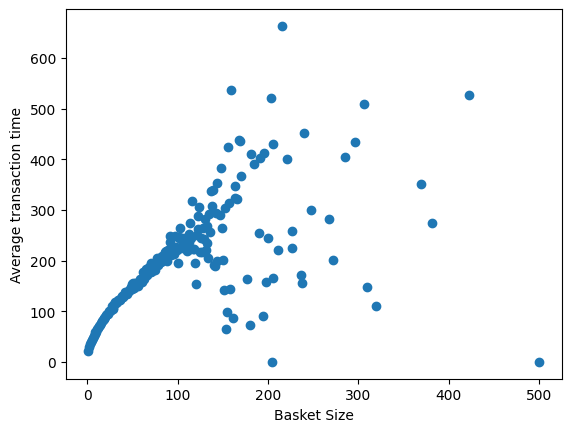

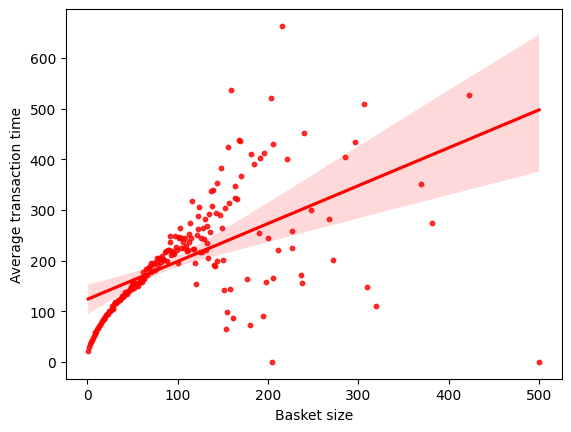

In [18]:
#Question no 3: How does the average transaction time change with the basket size? Is there a non-linear relationship between these two variables?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data into a pandas dataframe
mergedData = pd.read_csv('merged.csv')

# group the transactions by basket size and calculate the average transaction time
basketData = mergedData.groupby('ArtNum')['TranTime'].mean().reset_index()

# Creating scatter plot to visualize the relationship between avg transaction time and basket size
plt.scatter(basketData['ArtNum'],basketData['TranTime'])
plt.xlabel('Basket Size')
plt.ylabel('Average transaction time')
plt.show()

# plot a scatter plot and a regression line between the two variables
sns.regplot(x=basketData['ArtNum'], y=basketData['TranTime'], scatter_kws={'s':10},color='red')
plt.xlabel('Basket size')
plt.ylabel('Average transaction time')
plt.show()

<ipython-input-19-c3867c72a4da>:8: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedData = pd.read_csv('merged.csv')
<ipython-input-19-c3867c72a4da>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  groupedDataPivot = groupedData.pivot('HourOfDay', 'DayOfWeek', 'TransactionCount')
<ipython-input-19-c3867c72a4da>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=groupedData['DayOfWeek'], y=groupedData['HourOfDay'], s=groupedData['TransactionCount']*10, alpha=0.5, cmap='coolwarm')


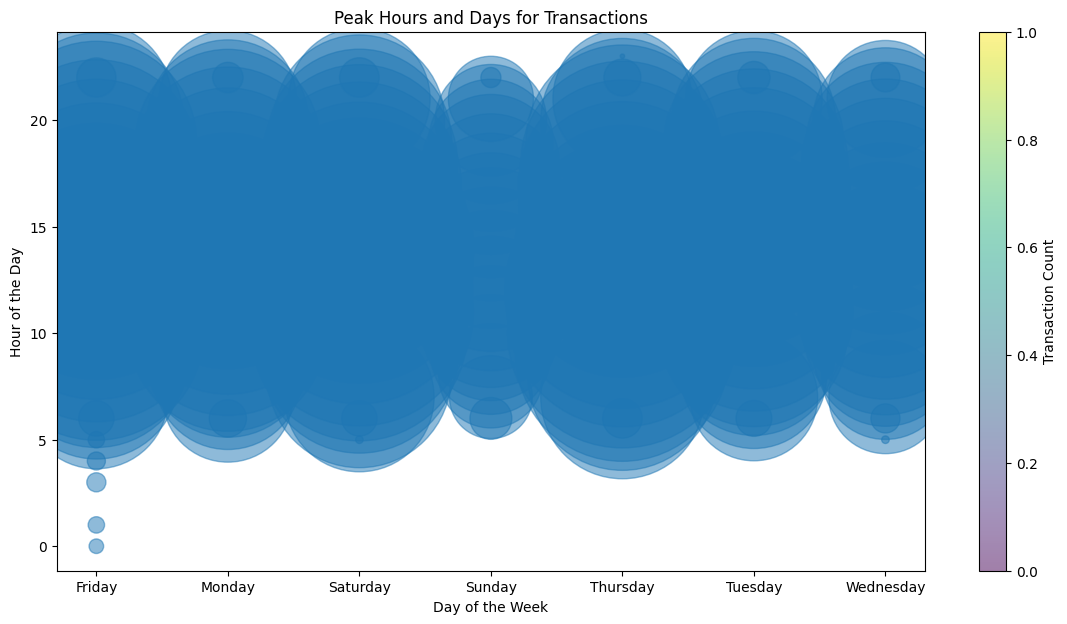

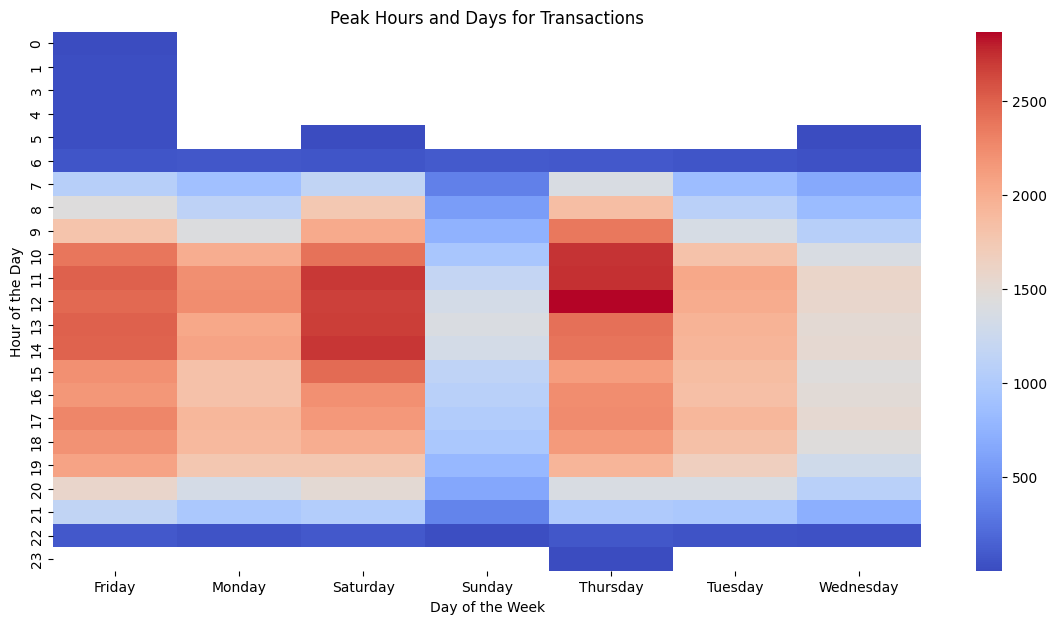

The peak day for transactions is 0 and the peak hour is 1
DayOfWeek  HourOfDay  TransactionCount    Amount
   Friday         11              2508 184412.15
   Monday         12              2232 128712.69
 Saturday         14              2719 211851.84
   Sunday         13              1399 100489.47
 Thursday         12              2867 179313.05
  Tuesday         11              2042 123379.99
Wednesday         11              1582  94340.68


<ipython-input-19-c3867c72a4da>:53: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avgTransactionVolume = groupedData.pivot('HourOfDay', 'DayOfWeek', 'TransactionCount').mean(axis=1)
<ipython-input-19-c3867c72a4da>:54: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avgTransactionAmount = groupedData.pivot('HourOfDay', 'DayOfWeek', 'Amount').mean(axis=1)


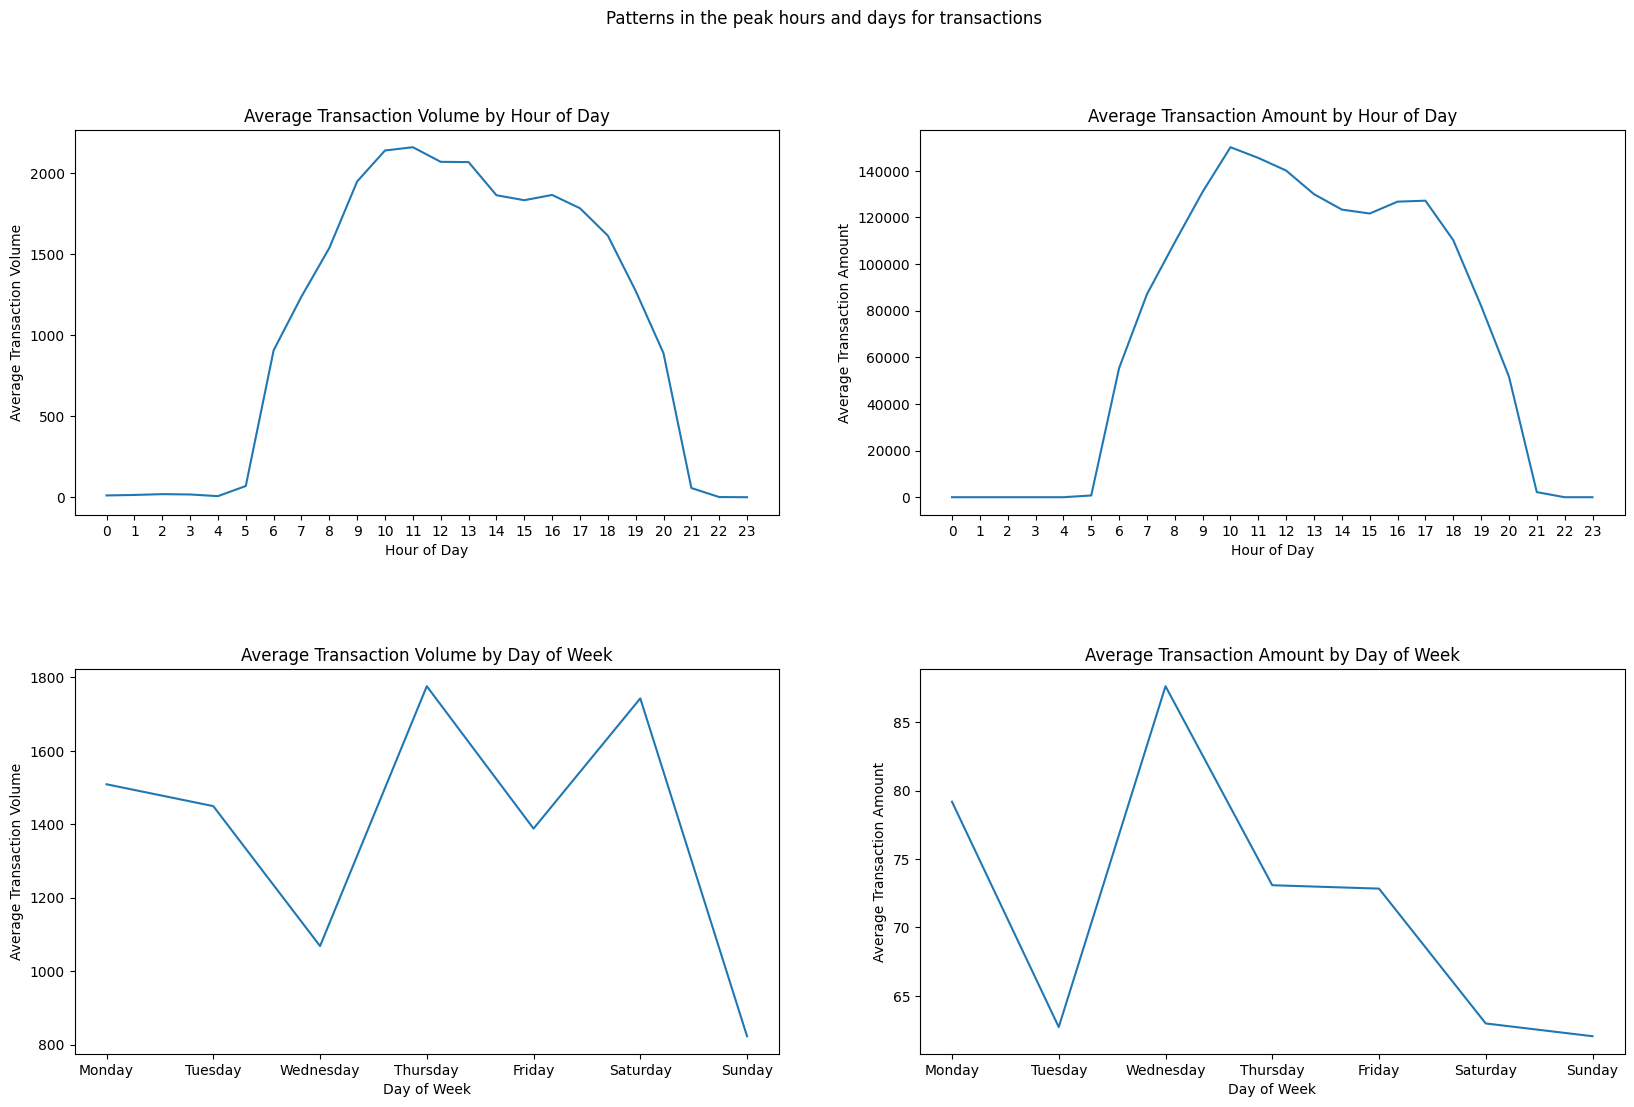

In [19]:
#Question no 4: What are the peak hours and days for transactions at the supermarket? Are there any patterns or trends?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
mergedData = pd.read_csv('merged.csv')

# Convert the 'BeginDateTime' column to datetime format
mergedData['BeginDateTime'] = pd.to_datetime(mergedData['BeginDateTime'])

# Create a new variable that contains the day of the week and hour of the day for each transaction
# Extract the hour and day of the week from the 'BeginDateTime' column
mergedData['HourOfDay'] = mergedData['BeginDateTime'].dt.hour
mergedData['DayOfWeek'] = mergedData['BeginDateTime'].dt.day_name()
mergedData['Day'] = mergedData['BeginDateTime'].dt.dayofweek

# Group the transactions by hour of the day and day of the week and count the number of transactions in each group
groupedData = mergedData.groupby(['DayOfWeek', 'HourOfDay']).agg({'TranID': 'count', 'Amount': 'sum'}).reset_index()
groupedData.rename(columns={'TranID': 'TransactionCount'}, inplace=True)

# Pivot the table to get the count of transactions for each day of the week and hour of the day
groupedDataPivot = groupedData.pivot('HourOfDay', 'DayOfWeek', 'TransactionCount')

# Create a scatter plot to visualize peak hours and days for transaction
plt.figure(figsize=(14,7))
plt.scatter(x=groupedData['DayOfWeek'], y=groupedData['HourOfDay'], s=groupedData['TransactionCount']*10, alpha=0.5, cmap='coolwarm')
plt.title('Peak Hours and Days for Transactions')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.colorbar(label='Transaction Count')
plt.show()

# Plot the seaborn heatmap to visualize peak hours and days for transaction
plt.figure(figsize=(14,7))
sns.heatmap(groupedDataPivot, cmap="coolwarm")
plt.title('Peak Hours and Days for Transactions')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


# Identify peak hours and days
peakDay, peakHour = np.unravel_index(np.argmax(groupedDataPivot), groupedDataPivot.shape)
print("The peak day for transactions is", peakDay, "and the peak hour is", peakHour)

# Find the hour with the highest number of transactions for each day of the week
peakHours = groupedData.loc[groupedData.groupby('DayOfWeek')['TransactionCount'].idxmax()]
print(peakHours.to_string(index=False))

# Calculate average transaction volume and amount for each day and hour
avgTransactionVolume = groupedData.pivot('HourOfDay', 'DayOfWeek', 'TransactionCount').mean(axis=1)
avgTransactionAmount = groupedData.pivot('HourOfDay', 'DayOfWeek', 'Amount').mean(axis=1)

# Create line charts to visualize transaction volume and amount over hour of the day and day of the week
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

#Plot#1
avgTransactionVolume = np.append(avgTransactionVolume, [0])
axs[0, 0].plot(np.arange(24), avgTransactionVolume)
axs[0, 0].set_xticks(np.arange(24))
axs[0, 0].set_xticklabels(np.arange(24))
axs[0, 0].set_xlabel('Hour of Day')
axs[0, 0].set_ylabel('Average Transaction Volume')
axs[0, 0].set_title('Average Transaction Volume by Hour of Day')

#Plot#2
avgTransactionAmount = np.append(avgTransactionAmount, [0])
axs[0, 1].plot(np.arange(24), avgTransactionAmount)
axs[0, 1].set_xticks(np.arange(24))
axs[0, 1].set_xticklabels(np.arange(24))
axs[0, 1].set_xlabel('Hour of Day')
axs[0, 1].set_ylabel('Average Transaction Amount')
axs[0, 1].set_title('Average Transaction Amount by Hour of Day')

#Plot#3
# group the data by day of week and hour of day
groupedData = mergedData.groupby(['Day', 'HourOfDay']).agg({'TranID': 'count', 'Amount': 'sum'}).reset_index()
groupedData.rename(columns={'TranID': 'TransactionCount'}, inplace=True)

# calculate the average transaction volume for each day of the week
avgTransactionVolume = []
for i in range(7):
    dayData = groupedData[groupedData['Day'] == i]
    avgVolume = dayData['TransactionCount'].mean()
    avgTransactionVolume.append(avgVolume)

axs[1, 0].plot(np.arange(7), avgTransactionVolume)
axs[1, 0].set_xticks(np.arange(7))
axs[1, 0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[1, 0].set_xlabel('Day of Week')
axs[1, 0].set_ylabel('Average Transaction Volume')
axs[1, 0].set_title('Average Transaction Volume by Day of Week')

#Plot#4
# Aggregate transaction data by day of the week and calculate average transaction amount
avgTransactionAmount = mergedData.groupby('DayOfWeek')['Amount'].mean()

axs[1, 1].plot(np.arange(7), avgTransactionAmount)
axs[1, 1].set_xticks(np.arange(7))
axs[1, 1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[1, 1].set_xlabel('Day of Week')
axs[1, 1].set_ylabel('Average Transaction Amount')
axs[1, 1].set_title('Average Transaction Amount by Day of Week')

# Set the overall title for the figure
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Patterns in the peak hours and days for transactions')
plt.show()

In [4]:
#Question no 5: Develop a regression model to predict transaction time with at least the following variables: basket size (ArtNum), payment method, and checkout type. Use the model to answer the following question. How do break times and their durations affect the transaction time of the following transactions?
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

mergedData = pd.read_csv("/content/posTransactionsMerged.csv")

# drop rows where Boolean Column is null
mergedData = mergedData.dropna(subset=['TNcash'])

# create new column Payment method based on existing column Tncard and TNcash
mergedData['PaymentMethod'] = mergedData.apply(lambda x: 'TNcash' if x['TNcash'] else ('TNcard' if x['TNcard'] else 'Unknown'), axis=1)

# create new column Checkout type based on existing column WorkstationGroupID
mergedData['CheckoutType'] = mergedData.apply(lambda x: 'Service' if x['WorkstationGroupID'] == 1 else ('Self service' if x['WorkstationGroupID'] == 8 else 'Unknown'), axis=1)

# create dummy variables for payment method and checkout type
mergedData = pd.get_dummies(mergedData, columns=['WorkstationGroupID', 'PaymentMethod'])

# create X and y variables
X = mergedData[['ArtNum', 'WorkstationGroupID_1', 'WorkstationGroupID_8', 'PaymentMethod_TNcash', 'PaymentMethod_TNcard']]
y = mergedData['TranTime']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit linear regression model on training data
model = LinearRegression().fit(X_train, y_train)

# make predictions on testing data
y_pred = model.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean squared error: {mse:.2f}')

# Evaluate the model's performance
print('R-squared:', model.score(X_test, y_test))

# Check the coefficients of the model
print(model.coef_)

# Filter for the relevant transactions and break times
relevant_data = mergedData[(mergedData['CheckoutType'] == 'Self service') & (mergedData['BreakTime'] > 0)]

# Calculate the durations of each break
durations = mergedData['BreakTime']

# Calculate the average transaction time for each cashier
avg_times = mergedData.groupby('OperatorID')['TranTime'].mean()

# Merge the durations and average transaction times into a single dataframe
results = pd.concat([durations, avg_times], axis=1).reset_index()
results = results.dropna()

# Fit a regression model to predict the effect of break duration on transaction time
model = sm.OLS(results['TranTime'], sm.add_constant(results['BreakTime'])).fit()

# Print the summary statistics for the model
print(model.summary())

mergedData['shiftEnded'] = (mergedData['BreakTime']) > 60

# use a lambda function to apply a conditional statement to create a new column
mergedData['shiftStatus'] = mergedData['shiftEnded'].apply(lambda x: 'Shift ended' if x else 'Shift not ended')
print(mergedData)


Mean squared error: 1685.48
R-squared: 0.5418816066788785
[  2.56219298 -29.65883821  29.65883821  32.87859454  36.74516666]
                            OLS Regression Results                            
Dep. Variable:               TranTime   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1393
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.710
Time:                        19:28:23   Log-Likelihood:                -290.12
No. Observations:                  71   AIC:                             584.2
Df Residuals:                      69   BIC:                             588.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [20]:
#Question no 6: Create a new variable representing the time of day (morning, afternoon, evening, and night) based on the BeginDateTime. How do payment methods (cash vs. card) vary across different times of the day?

import pandas as pd

# Read in the CSV file
mergedData = pd.read_csv('merged.csv')

# create new column 'PaymentMethod' based on values in TNcash and TNcard columns
mergedData['PaymentMethod'] = mergedData.apply(lambda x: 'Cash' if x['TNcash'] else ('Card' if x['TNcard'] else 'Unknown'), axis=1)

# Convert the BeginDateTime column to datetime format
mergedData['BeginDateTime'] = pd.to_datetime(mergedData['BeginDateTime'])

# Create a new column for the time of day
mergedData['TimeOfDay'] = mergedData['BeginDateTime'].apply(lambda x: 'Night' if x.hour <= 6 
                                                                  else 'Morning' if x.hour <= 12 
                                                                  else 'Afternoon' if x.hour <= 18 
                                                                  else 'Evening')
                                                            

# Group the data by time of day and payment method and calculate the transaction counts
transactionCounts = mergedData.groupby(['TimeOfDay', 'PaymentMethod']).size().reset_index(name='TransactionCount')

# Pivot the table to a more readable format
pivoted = transactionCounts.pivot_table(values='TransactionCount', index='TimeOfDay', columns='PaymentMethod')

# Rename the columns and format the output
pivoted.columns = [col.capitalize() for col in pivoted.columns]
pivoted.index.name = 'Day'
print(pivoted)



<ipython-input-20-0f8d12f05921>:6: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedData = pd.read_csv('merged.csv')


            Card   Cash  Unknown
Day                             
Afternoon  37802  41986      625
Evening    13159  13479      207
Morning    26453  42715      381
Night        124    411       31


In [21]:
#Question no 7: Build a logistic regression model to predict the probability of a customer choosing self-service based on factors such as time of day, day of the week, basket size, and transaction value. Which factors are the most significant predictors of choosing self-service over cashier service? Do consumers prefer using self-service checkouts during peak hours compared to regular hours?

import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the datase
mergedData = pd.read_csv('merged.csv')

# Create a binary target variable for self-service
mergedData['selfService'] = (mergedData['WorkstationGroupID'] == 8).astype(int)

# Extract the time of day from BeginDateTime
mergedData['TimeOfDay'] = [datetime.datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S').time() for dt in mergedData['BeginDateTime']]
mergedData['TimeOfDay'] = [(t.hour * 3600 + t.minute * 60 + t.second) / 86400 for t in mergedData['TimeOfDay']]

# Convert the 'BeginDateTime' column to datetime format
mergedData['BeginDateTime'] = pd.to_datetime(mergedData['BeginDateTime'])

# Extract the hour and day of the week from the 'BeginDateTime' column
mergedData['HourOfDay'] = mergedData['BeginDateTime'].dt.hour
mergedData['DayOfWeek'] = mergedData['BeginDateTime'].dt.dayofweek

# Split the dataset into training and test sets
X = mergedData[['TimeOfDay', 'DayOfWeek', 'ArtNum', 'Amount']]
y = mergedData['selfService']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

X_imputed = imputer.fit_transform(X)

# Fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Predict the probability of self-service for the test data
y_pred = model.predict_proba(X_test_imputed)[:,1]

# Make predictions on the test set
y_predz = model.predict(X_test_imputed)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy:", accuracy)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_predz.round())
print("Accuracy:", accuracy)

# Identify significant predictors
coefficients = model.coef_
feature_importances = abs(coefficients) / abs(coefficients).sum()
print("Feature importances:", feature_importances)

# Analyze peak vs. regular hours
predictions = model.predict_proba(X_imputed)
mergedData['predicted_probability'] = predictions[:, 1]
peak_hours = mergedData[(mergedData['TimeOfDay'] >= 8) & (mergedData['TimeOfDay'] <= 10) & (mergedData['DayOfWeek'] < 5)]
regular_hours = mergedData[(mergedData['TimeOfDay'] < 8) | (mergedData['TimeOfDay'] > 10) | (mergedData['DayOfWeek'] >= 5)]
peak_probability = peak_hours['predicted_probability'].mean()
regular_probability = regular_hours['predicted_probability'].mean()
print("Peak hour probability:", peak_probability)
print("Regular hour probability:", regular_probability*100)



<ipython-input-21-3f3337a0fd30>:11: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedData = pd.read_csv('merged.csv')


Accuracy: 0.7712755461592671
Accuracy: 0.7712755461592671
Feature importances: [[0.60113292 0.01787823 0.3630266  0.01796225]]
Peak hour probability: nan
Regular hour probability: 22.838777430498496
